**Задание 1.**

1. Создайте небольшой датасет (3-4 текста) с помощью нашего "примитивного" веб-кролера (вспомните семинар 6). 
2. Выполните его предобработку (с помощью библиотеки BeautifulSoup - также семинар 6; удалите оставшийся мусор в тексте с помощью регулярных выражений - семинар 5).
3. Итоговый датасет должен представлять собой список из четырех строковых элементов.
4. Создайте дополнительный вариант, где токенизированы тексты и удалены стоп-слова, используя библиотеки spacy или nltk. Итогом должен быть список из таких текстов.

С помощью Текстометра трем учебным текстам присвоен уровень.

In [168]:
import urllib.request
from bs4 import BeautifulSoup
import re

In [169]:
listtxt = [] #пустой список для текстов
tokenized = []

a2 = "http://rus.lang-study.com/teksty/uchebnye-texty/biografiya/" #сохраняем три ссылки
b1 = "http://rus.lang-study.com/teksty/uchebnye-texty/pogoda/"
b2 = "http://rus.lang-study.com/teksty/uchebnye-texty/nauchnyj-progress/"

f = urllib.request.urlopen(a2) #открываем первую ссылку
pretext = f.read().decode('UTF-8') #читаем текст в нужной для кириллицы кодировке
soup = BeautifulSoup(pretext,'html.parser').get_text().lower().replace('\n', ' ') #удаляем html-тэги, приводим к нижнему регистру и убираем абзацы
family = re.findall(r'(федя и надя – .* мальчиком.)', soup) #извлекаем из всей страницы нужный текст, обращаясь к уникальным символам в его начале и конце
fsent = re.sub('[^а-яё .!?]', '', family[0]) #сохраняем вариант с разбивкой на предложения
family[0] = re.sub('[^а-яё ]', '', family[0]) #удаляем все небуквенные символы
family[0] = re.sub('\s+', ' ', family[0]) #удаляем повторяющиеся пробелы

f = urllib.request.urlopen(b1) #второй текст
pretext = f.read().decode('UTF-8')
soup = BeautifulSoup(pretext,'html.parser').get_text().lower().replace('\n', ' ')
weather = re.findall(r'(погода – .* праздников.)', soup)
wsent = re.sub('[^а-яё .!?]', '', weather[0])
weather[0] = re.sub('[^а-яё ]', '', weather[0])
weather[0] = re.sub('\s+', ' ', weather[0])

f = urllib.request.urlopen(b2) #третий текст
pretext = f.read().decode('UTF-8')
soup = BeautifulSoup(pretext,'html.parser').get_text().lower().replace('\n', ' ')
science = re.findall(r'(достижения п.*ого мира.)', soup)
ssent = re.sub('[^а-яё .!?]', '', science[0])
science[0] = re.sub('[^а-яё ]', '', science[0])
science[0] = re.sub('\s+', ' ', science[0])

listtxt.append(family[0]) #в одном списке сохраняем строки
listtxt.append(weather[0])
listtxt.append(science[0]) 
print(listtxt) #список из трех строк, содержащих почищенный от небуквенного мусора текст

['федя и надя брат и сестра внешне они похожи друг на друга но по характеру очень разные у ребят тёмные глаза прямые русые волосы и милая улыбка федя носит усы он высокий надя ниже чем её брат у неё длинные волосы и много веснушек в детстве их часто путали потому что надя любила надевать одежду феди девочке нравилось носить широкие шорты брюки и тёмные джинсы а родители покупали ей только розовые платья по характеру надя была весёлая шумная быстрая она любила много двигаться играть заниматься спортом но увлечения девочки менялись очень часто сначала она занималась гимнастикой потом плаванием позже увлекалась теннисом затем лёгкой атлетикой родители всегда говорили что у нади семь пятниц на неделе федя был спокойнее он любил читать думать решать задачи и увлекался наукой мальчик хорошо учился в школе он часто помогал наде с математикой химией и физикой зато надя любила литературу и русский язык хорошо знала правила и объясняла их брату после окончания школы ребята поступили в университе

In [172]:
import spacy

In [173]:
#токенизируем
lst_tokenized = []
for strng in listtxt:
    lst_tokenized.append(re.split(r'[ ]', strng)) #по пробелу разделяем все три строки с текстами на списки слов

In [174]:
#удаляем стоп-слова
nlp = spacy.load('ru_core_news_sm') #подгружаем модель для русского языка
tokens = []
for x in range(len(lst_tokenized)): #проходимся по каждому из трех списков внутри корпуса
    str_tokenized = [word for word in lst_tokenized[x] if not word in nlp.Defaults.stop_words] #добавляем каждое слово в итоговый список, если они не входят в дефолтный список стоп-слов модели
    tokens.append(str_tokenized)
print(tokens) #список списков с токенизированными словами после удаления стоп-слов

[['федя', 'надя', 'брат', 'сестра', 'внешне', 'похожи', 'друг', 'друга', 'характеру', 'очень', 'разные', 'ребят', 'тёмные', 'глаза', 'прямые', 'русые', 'волосы', 'милая', 'улыбка', 'федя', 'носит', 'усы', 'высокий', 'надя', 'ниже', 'брат', 'длинные', 'волосы', 'много', 'веснушек', 'детстве', 'часто', 'путали', 'потому', 'надя', 'любила', 'надевать', 'одежду', 'феди', 'девочке', 'нравилось', 'носить', 'широкие', 'шорты', 'брюки', 'тёмные', 'джинсы', 'родители', 'покупали', 'розовые', 'платья', 'характеру', 'надя', 'весёлая', 'шумная', 'быстрая', 'любила', 'много', 'двигаться', 'играть', 'заниматься', 'спортом', 'увлечения', 'девочки', 'менялись', 'очень', 'часто', 'сначала', 'занималась', 'гимнастикой', 'потом', 'плаванием', 'позже', 'увлекалась', 'теннисом', 'затем', 'лёгкой', 'атлетикой', 'родители', 'всегда', 'говорили', 'нади', 'семь', 'пятниц', 'неделе', 'федя', 'спокойнее', 'любил', 'читать', 'думать', 'решать', 'задачи', 'увлекался', 'наукой', 'мальчик', 'хорошо', 'учился', 'школ

**Задание 2.**

1. Создайте таблицу в pandas (DataFrame). Пусть в нем будет пока только один столбец 'Text name' будут записаны названия текстов вашего датасета.
2. Напишите простой цикл, обернув его в функцию, который считал бы длины каждого строкового элемента в вашем датасете. Итогом (return) этой функции должен быть новый список, равный длине датасета. Каждый элемент - это число слов в каждом из текстов. Например, [5000, 1947, 43300].
3. Присоедините этот столбец к вашему фрейму.
4. Посчитайте средние длины слов в вашем корпусе, запишите также в словарь и присоедините этот столбец к датафрейму.
5. Посчитайте средние длины предложений в вашем корпусе, добавьте их в датафрейм.

In [175]:
import pandas as pd 
table = pd.DataFrame({ #создаем датасет с одним столбцом с названиями трех текстов
    "Name": ['Family (A2)', 'Weather (B1)', 'Science (B2)']
})

In [176]:
#длины текстов
def lengthscount(corpus): #функция, принимающая на вход список списков токенов
    lengths = []
    for text in corpus: #для каждого элемента списка, токенизированного текста, считаем его длину и сохраняем в переменную
        lengths.append(len(text))
    return lengths

In [177]:
table["Words"] = lengthscount(tokens) #добавляем столбец с длинами текстов, применив функцию на полученном ранее списке с токенизированными текстами, без стоп-слов

In [178]:
#средние длины слов считать имеет смысл на не очищенном от стоп-слов варианте корпуса
def avrglenwrd(corp):
    a = 0
    avrglengths = [] #список для результата
    for a in range(len(corp)): #проходимся по трем текстам поочередно
        charcounter = 0 #счетчик символов, обнуляющийся с каждым новым текстом
        for word in corp[a].split(): #в каждом тексте складываем сумму символов, проходясь по словам
            charcounter += len(word)
        avrglengths.append(round(charcounter/len(text.split()), 2)) #получаем результат и округляем
        a += 1
    return avrglengths

In [179]:
table["Length of word"] = avrglenwrd(listtxt) #заведем столбец для данных о средней длине слова в символах в каждом тексте

In [180]:
#средние длины предложений (в словах) по текстам, т. е. количество слов текста/количество предложений в тексте
sents = [fsent, wsent, ssent] #соединяем полученные ранее строки текстов с разделителями предложений
sentcount = [] #список для количества предложений в каждом тексте
for text in sents:
    sentcount.append(len(re.findall(r'([\.?!])', text))) #считаем количество разделителей предложений в тексте
wordcount = [] #список для количества слов включая стоп-слова
for x in range(len(listtxt)):
    wordcount.append(len(listtxt[x].split())) #считаем количество слов, деля строку по пробелам
count = [] #список для результата
for i in range(len(wordcount)):
    count.append(round(wordcount[i] / sentcount[i], 2)) #получаем с помощью деления значение для каждого текста, округляем до сотых
table["Length of sentence"] = count #добавляем к датасету столбец с данными

In [181]:
print(table)

           Name  Words  Length of word  Length of sentence
0   Family (A2)    218            3.57               11.54
1  Weather (B1)    250            4.49               14.96
2  Science (B2)    313            6.56               21.05


**Задание 3.**
1. Добавьте еще один столбец с морфологической информацией, например, о количестве существительных в текстах; среднем употреблении глаголов на предложение или что-то иное; таких столбцов должно добавиться два.
2. Повторите предыдущее, только с синтаксической информацией (например, количество деепричастных оборотов на предложение).

In [182]:
#доля существительных в тексте, т. е. количество существительных/wordcount
sum = 0
nouns = []
nounrate = []
for text in listtxt:
    for token in nlp(text):
        if token.pos_ == 'NOUN':
            sum += 1
    nouns.append(sum)
for i in range(len(nouns)):
    nounrate.append(round(nouns[i] / wordcount[i], 2))
table["Noun %"] = nounrate

In [183]:
#количество прилагательных
sum = 0
adj = []
for text in listtxt:
    for token in nlp(text):
        if token.pos_ == 'ADJ':
            sum += 1
    adj.append(sum)
table["Adjectives"] = adj

In [184]:
#количество именных подлежащих
sum = 0
nsubj = []
for text in listtxt:
    for token in nlp(text):
        if token.dep_ == 'nsubj':
            sum += 1
    nsubj.append(sum)
table["Nominal subjects"] = nsubj

In [185]:
#количество сентенциальных подлежащих (вершина группы - инфинитив)
sum = 0
csubj = []
for text in listtxt:
    for token in nlp(text):
        if token.dep_ == 'csubj':
            sum += 1
    csubj.append(sum)
print(csubj)
table["Clausal subjects"] = csubj

[3, 4, 5]


In [186]:
table["Level"] = [1, 2, 3]

In [187]:
print(table)

           Name  Words  Length of word  Length of sentence  Noun %  \
0   Family (A2)    218            3.57               11.54    0.30   
1  Weather (B1)    250            4.49               14.96    0.62   
2  Science (B2)    313            6.56               21.05    0.79   

   Adjectives  Nominal subjects  Clausal subjects  Level  
0          34                30                 3      1  
1          76                66                 4      2  
2         139                95                 5      3  


**Задание 4.**
1. Визуализируйте распределения ваших данных с помощью двух любых графиков.
2. Скореллируйте любые два параметра. Кореллирует ли, например, средняя длина предложения со средней длиной слов? 3. Также если у вас есть параметр вроде уровня текста (например, ваш корпус представляет собой тексты для изучающих язык как иностранный, адаптированные по разным уровня), то скореллируйте извлеченные параметры с уровнем. Показывают ли они это изменение?

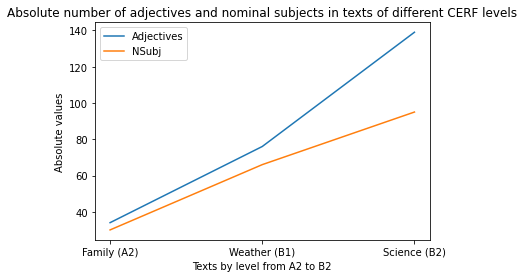

In [188]:
#визуализируем распределение числа прилагательных и именных подлежащих в текстах - это два параметра в абсолютных значениях, которые относительно уровня текста ясно распределены

import matplotlib.pyplot as plt

x1 = table["Name"]
y1 = table["Adjectives"]
plt.plot(x1, y1, label = "Adjectives")
 
x2 = table["Name"]
y2 = table["Nominal subjects"]
plt.plot(x2, y2, label = "NSubj")

plt.xlabel('Texts by level from A2 to B2')
plt.ylabel('Absolute values')
plt.title('Absolute number of adjectives and nominal subjects in texts of different CERF levels')
plt.legend()
plt.show()

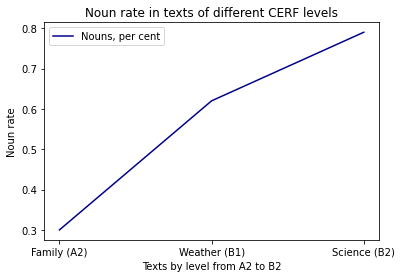

In [189]:
#покажем распределение единственного параметра в долях, доли существительных среди других частей речи

x = table["Name"]
y = table["Noun %"]
plt.plot(x, y, label = "Nouns, per cent", color = 'darkblue')

plt.xlabel('Texts by level from A2 to B2')
plt.ylabel('Noun rate')
plt.title('Noun rate in texts of different CERF levels')
plt.legend()
plt.show()

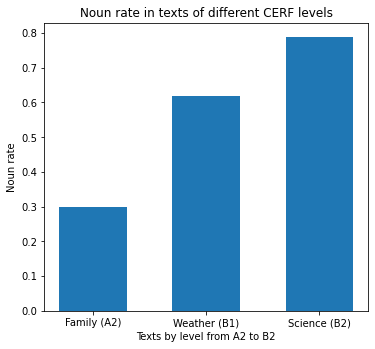

In [191]:
#то же в виде столбчатой диаграммы
plt.figure().add_axes([0, 0, 0.75, 1]).bar(table["Name"], table["Noun %"], 0.6)
plt.xlabel('Texts by level from A2 to B2')
plt.ylabel('Noun rate')
plt.title('Noun rate in texts of different CERF levels')
plt.show()

In [192]:
correlation_df = table.corr()
correlation_df

,Words,Length of word,Length of sentence,Noun %,Adjectives,Nominal subjects,Clausal subjects,Level
Words,1.000000,0.999479,0.999674,0.935491,0.997462,0.969329,0.982712,0.982712
Length of word,0.999479,1.000000,0.998329,0.923594,0.994643,0.960887,0.976221,0.976221
Length of sentence,0.999674,0.998329,1.000000,0.944203,0.998954,0.975284,0.987116,0.987116
Noun %,0.935491,0.923594,0.944203,1.000000,0.958274,0.993641,0.984738,0.984738
Adjectives,0.997462,0.994643,0.998954,0.958274,1.000000,0.984366,0.993399,0.993399
Nominal subjects,0.969329,0.960887,0.975284,0.993641,0.984366,1.000000,0.998073,0.998073
Clausal subjects,0.982712,0.976221,0.987116,0.984738,0.993399,0.998073,1.000000,1.000000
Level,0.982712,0.976221,0.987116,0.984738,0.993399,0.998073,1.000000,1.000000


<AxesSubplot:>

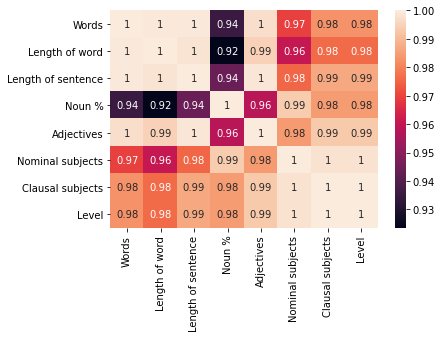

In [193]:
sns.heatmap(correlation_df, annot=True)

Каждый параметр сильно коррелирует с каждым другим. Скорее всего, так быть не должно и связано это с недостаточным разнообразием данных, небольшой длиной текстов, малыми значениями параметров. Не стоит доверять корреляции, например, именных и сентенциальных подлежащих, частей одного класса.
Что похоже на правду: чем выше уровень учебного текста, тем этот текст длиннее; чем выше уровень учебного текста, тем больше в нем сентенциальных подлежащных оборотов (неочевидной, сложной синтаксической конструкции); чем выше уровень текста, тем выше в нем доля существительных (т. е. тем короче выражаются предикации); чем выше уровень текста, тем выше средние длины слова и предложений.

In [194]:
correlation_df2 = table.corr(method='spearman')
correlation_df2

,Words,Length of word,Length of sentence,Noun %,Adjectives,Nominal subjects,Clausal subjects,Level
Words,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Length of word,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Length of sentence,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Noun %,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Adjectives,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Nominal subjects,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Clausal subjects,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Level,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Изменение метода корреляции на метод Спирмена не позволяет сделать каких-либо выводов, но только больше подтверждает недостаточность нашего корпуса.